<a href="https://colab.research.google.com/github/Celestin25/heart-disease-prediction/blob/main/Transfer_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Kaggle API

In [1]:
!pip install kaggle

upload kaggle.json

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hakorimanacelestin","key":"8defc3134f72e591349b3d916dd0e4ea"}'}

Kaggle API:

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Download and unzip the dataset from Kaggle

In [4]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection
!unzip brain-mri-images-for-brain-tumor-detection.zip -d brain_mri


Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 33% 5.00M/15.1M [00:00<00:00, 34.5MB/s]
100% 15.1M/15.1M [00:00<00:00, 86.4MB/s]
Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_mri/brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_mri/brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_mri/brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_mri/brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_mri/brain_tumor_dat

Load and Preprocess Data

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


Structure

In [7]:
import os

for root, dirs, files in os.walk('brain_mri'):
    print(root, dirs, files)


brain_mri ['brain_tumor_dataset', 'yes', 'no'] []
brain_mri/brain_tumor_dataset ['yes', 'no'] []
brain_mri/brain_tumor_dataset/yes [] ['Y12.jpg', 'Y161.JPG', 'Y242.JPG', 'Y255.JPG', 'Y56.jpg', 'Y183.jpg', 'Y7.jpg', 'Y39.jpg', 'Y256.JPG', 'Y162.jpg', 'Y25.jpg', 'Y2.jpg', 'Y30.jpg', 'Y244.JPG', 'Y45.JPG', 'Y77.jpg', 'Y116.JPG', 'Y96.jpg', 'Y258.JPG', 'Y181.jpg', 'Y106.jpg', 'Y147.JPG', 'Y167.JPG', 'Y35.jpg', 'Y160.JPG', 'Y8.jpg', 'Y92.jpg', 'Y148.JPG', 'Y257.jpg', 'Y85.JPG', 'Y37.jpg', 'Y79.jpg', 'Y74.jpg', 'Y54.jpg', 'Y112.JPG', 'Y34.jpg', 'Y14.jpg', 'Y245.jpg', 'Y194.jpg', 'Y195.JPG', 'Y163.JPG', 'Y92.png', 'Y155.JPG', 'Y86.JPG', 'Y32.jpg', 'Y76.jpg', 'Y253.JPG', 'Y91.jpg', 'Y31.jpg', 'Y95.jpg', 'Y168.jpg', 'Y105.jpg', 'Y11.jpg', 'Y16.JPG', 'Y44.JPG', 'Y4.jpg', 'Y52.jpg', 'Y188.jpg', 'Y20.jpg', 'Y182.JPG', 'Y67.JPG', 'Y59.JPG', 'Y33.jpg', 'Y250.jpg', 'Y1.jpg', 'Y9.jpg', 'Y65.JPG', 'Y158.JPG', 'Y41.jpg', 'Y146.JPG', 'Y113.JPG', 'Y157.JPG', 'Y114.JPG', 'Y3.jpg', 'Y53.jpg', 'Y154.jpg', 'Y

Load and preprocess images

In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def load_data(data_dir):
    images = []
    labels = []
    print(f"Loading data from {data_dir}")
    for file in os.listdir(data_dir):
        img_path = os.path.join(data_dir, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)

            label = os.path.basename(data_dir)
            labels.append(label)
        else:
            print(f"Failed to load image at {img_path}")
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

data_dir_yes = 'brain_mri/brain_tumor_dataset/yes'
data_dir_no = 'brain_mri/brain_tumor_dataset/no'

images_yes, labels_yes = load_data(data_dir_yes)
images_no, labels_no = load_data(data_dir_no)

images = np.concatenate((images_yes, images_no), axis=0)
labels = np.concatenate((['yes']*len(labels_yes), ['no']*len(labels_no)), axis=0)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = to_categorical(labels, num_classes=2)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"Number of training samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")


Loading data from brain_mri/brain_tumor_dataset/yes
Loading data from brain_mri/brain_tumor_dataset/no
Number of training samples: 202
Number of test samples: 51


Import TensorFlow and Keras

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3


Define and Train Models

ResNet-50

In [19]:
def resnet50(input_size=(128, 128, 1)):
    inputs = Input(input_size)

    x = Lambda(lambda x: tf.image.grayscale_to_rgb(x))(inputs)
    resnet50_base = ResNet50(include_top=False, weights='imagenet', input_tensor=x)
    x = Flatten()(resnet50_base.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(2, activation='softmax')(x)
    model = Model(inputs=[inputs], outputs=[x])
    model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

resnet_model = resnet50()
resnet_model.summary()
history_resnet = resnet_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 128, 128, 3)          0         ['input_6[0][0]']             
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['lambda[0][0]']              
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                              

VGG19

In [20]:
def vgg19(input_size=(128, 128, 1)):
    inputs = Input(input_size)

    x = Lambda(lambda x: tf.image.grayscale_to_rgb(x))(inputs)
    vgg19_base = VGG19(include_top=False, weights='imagenet', input_tensor=x)
    x = Flatten()(vgg19_base.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(2, activation='softmax')(x)
    model = Model(inputs=[inputs], outputs=[x])
    model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

vgg_model = vgg19()
vgg_model.summary()
history_vgg = vgg_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 lambda_1 (Lambda)           (None, 128, 128, 3)       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       1475

Inception3

In [21]:
def inceptionv3(input_size=(128, 128, 1)):
    inputs = Input(input_size)

    x = Lambda(lambda x: tf.image.grayscale_to_rgb(x))(inputs)
    inceptionv3_base = InceptionV3(include_top=False, weights='imagenet', input_tensor=x)
    x = Flatten()(inceptionv3_base.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(2, activation='softmax')(x)
    model = Model(inputs=[inputs], outputs=[x])
    model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

inception_model = inceptionv3()
inception_model.summary()
history_inception = inception_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 lambda_2 (Lambda)           (None, 128, 128, 3)          0         ['input_8[0][0]']             
                                                                                                  
 conv2d_94 (Conv2D)          (None, 63, 63, 32)           864       ['lambda_2[0][0]']            
                                                                                                  
 batch_normalization_94 (Ba  (None, 63, 63, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                          

Evaluate and Compare Model Performance

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    return accuracy, loss, precision, recall, f1

metrics_resnet = evaluate_model(resnet_model, X_test, y_test)
metrics_vgg = evaluate_model(vgg_model, X_test, y_test)
metrics_inception = evaluate_model(inception_model, X_test, y_test)

print(f"ResNet-50: Accuracy={metrics_resnet[0]:.4f}, Loss={metrics_resnet[1]:.4f}, Precision={metrics_resnet[2]:.4f}, Recall={metrics_resnet[3]:.4f}, F1 Score={metrics_resnet[4]:.4f}")
print(f"VGG19: Accuracy={metrics_vgg[0]:.4f}, Loss={metrics_vgg[1]:.4f}, Precision={metrics_vgg[2]:.4f}, Recall={metrics_vgg[3]:.4f}, F1 Score={metrics_vgg[4]:.4f}")
print(f"InceptionV3: Accuracy={metrics_inception[0]:.4f}, Loss={metrics_inception[1]:.4f}, Precision={metrics_inception[2]:.4f}, Recall={metrics_inception[3]:.4f}, F1 Score={metrics_inception[4]:.4f}")


2/2 [==============================] - 12s 1s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 12s 6s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 3s 505ms/step
ResNet-50: Accuracy=0.5294, Loss=7996516.5000, Precision=0.2803, Recall=0.5294, F1 Score=0.3665
VGG19: Accuracy=0.5294, Loss=0.6627, Precision=0.2803, Recall=0.5294, F1 Score=0.3665
InceptionV3: Accuracy=0.5294, Loss=548.8704, Precision=0.2803, Recall=0.5294, F1 Score=0.3665


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Visualize the Training History

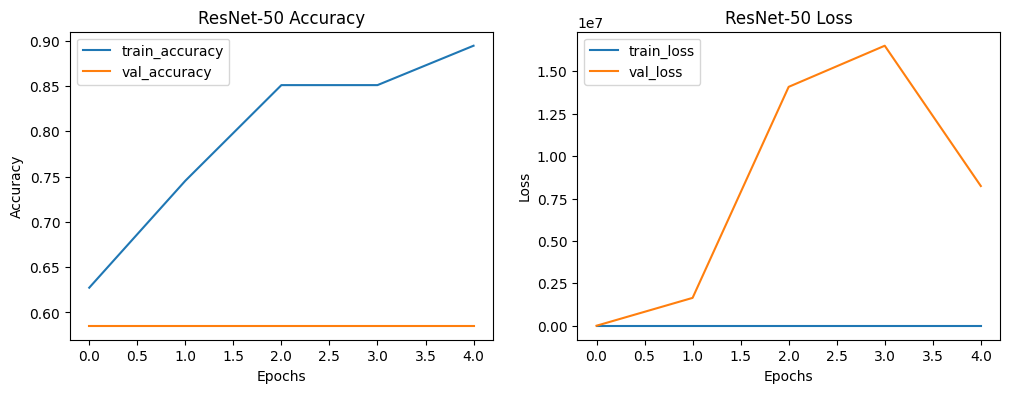

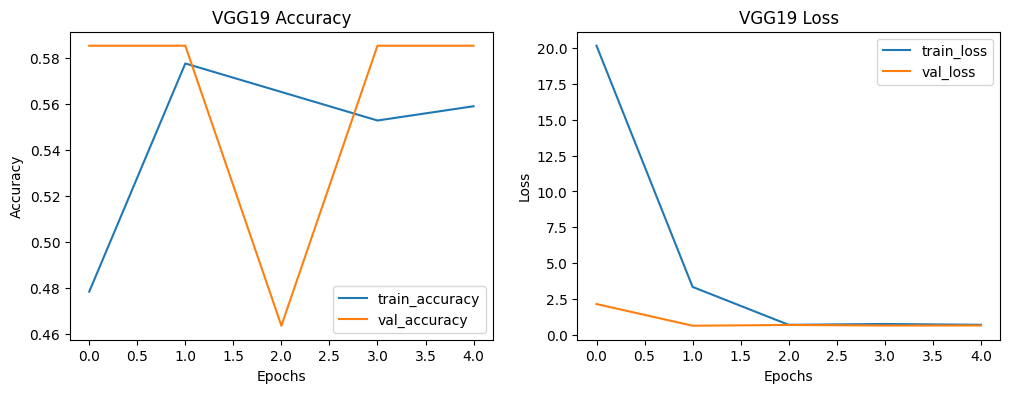

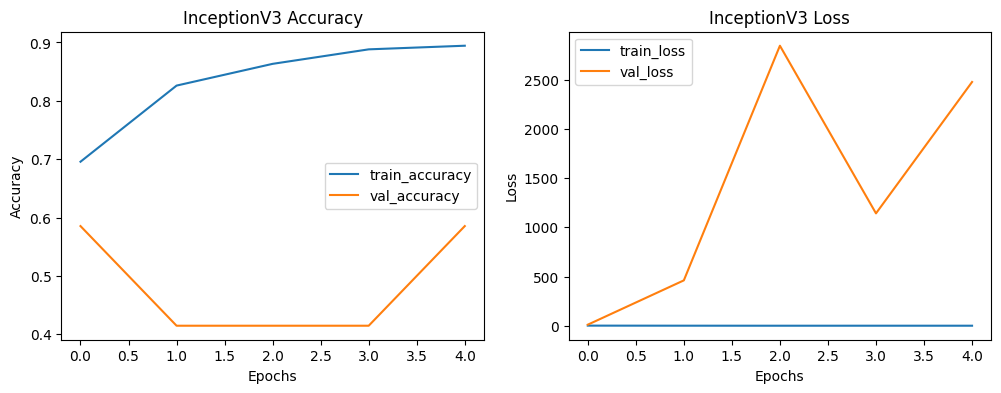

In [23]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history_resnet, 'ResNet-50')
plot_history(history_vgg, 'VGG19')
plot_history(history_inception, 'InceptionV3')
